# D209 Data Mining 1 - Task 2: Predictive Analysis

## Jan Francis Mitchell Barlaan 

### A1: PROPOSAL OF QUESTION
* The research question I aim to answer in this task using XGBoost, which is a gradient boosted Decision Tree, is which customer socioeconomic factors contribute the most to Tenure? I believe that this is also an important variable to observe since customers that stay longer may be less likely to churn, or at the very least, continue to be a source of revenue for the telecommunications company. They may also be a better target for new products and marketing campaigns since we can infer that their satisfaction is at least good enough to continue their service or possibly try new products. Additionally, as a general fact, customer retention is cheaper for the company as a whole versus spending resources to acquire new subscribers. 

### A2: DEFINED GOAL 
* The goal for this analysis is to discover patterns and specific variables that are more likely to contribute to an increase in customer Tenure. To a certain degree, it is logical to infer that Tenure and Churn have somewhat of an inverse relationship with each other. Obviously, those who have higher values for their Tenure either have not churned at all or have had a long interval since they have last churned. We will attempt to pinpoint certain key variables that may have a greater influence on a customer choosing to churn, which in turn would lead to a lower Tenure value. Successfully pinpointing these critical factors is helpful in custom-tailoring services, plans, and prices that would lead to an overall better product and experience. Ultimately, these would hopefully lead to higher customer satisfaction levels, subsequently leading to both continued and increased customer retention.

### B1: EXPLANATION OF PREDICTION
* I chose to use Extreme Gradient Boosting, more commonly known as XGBoost as my model for this task. XGBoost is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library which provides parallel tree boosting. Currently, it is the leading machine learning library for regression, classification, and ranking problems. At its core, XGBoost uses an ensemble learning algorithm similar to random forest, for classification and regression (NVIDIA, What is XGBoost? 2024). Additionally, XGBoost is very robust against outliers and multicolinearity (XGBoost robust to correlated input features (multi-collinearity) 2024; (XGBoost robust to outliers in data 2024)).
* These types of algorithms combine multiple machine learning algorithms to obtain a better model. This is the Boosting portion of the model in which each new tree corrects the mistakes of the previous trees by focusing on the residual errors (Sriraman, 2024). The Gradient portion in XGBoost refers to the portion of the algorithm that uses gradient descent optimization to minimize the errors in the predictions. 
* XGBoost is used by businesses to forecast future trends and make strategic decisions. Some examples of these are predicting customer churn, sales forecasting, inventory prediction, and usage in recommender systems to predict user preferences and recommend products or services (Wohlwend, 2023). In our case, increased tenure as a possible result of optimizing user preferences and products based on XGBoost predicitons is a helpful goal. This in turn could ultimately lead to prevention of customer churn. 

### B2: SUMMARY OF METHOD ASSUMPTION
* An assumption of XGBoost is that the data is iid . All samples in a dataset are Independent and Identically Distributed (XGBOOST assumes data is IID (i.i.d.) 2024). Additionally, assumes that weak learners (decision trees) can be combined to create a more potent, robust model (Rodriguez, 2023). 

### B3: PACKAGES OR LIBRARIES LIST

I chose to use Python 3 kernel within the Jupyter Notebook IDE to perform this task due to its ease of use and integration with visualization and statistical modeling. Using Python as the main programming language also enabled me to use several libraries:
* Pandas was used to easily handle large datasets
* Numpy was used in mathematical calculations and operations
* Matplotlib and Seaborn was used for visualizations
* Missigno was used to visualize nulls
* Scipy assisted in MLR modeling 
* Scikit-learn was used to perform multiple functions such as the train test, scores and statistics generation, and OneHotEncoding
* Scikit-optimize was used for functions such as BayesSearchCV, Real, Integer, DeadlineStopper, and DeltaYStopper
* xgboost was used for XGBoosting and using the sci-kit learn wrapper XGBRegressor 
* yellowbrick was used to plot residual plots for the training and test sets as well as Feature Importance plots
* SuperTree was used to plot an interactive XGBoost Regressor Tree
* Os was used with together with Graphviz, which was also used to plot a tree for the XGBoost Model since it is less resource intensive. Although it lacks interactivity that SuperTree has
* StratifiedKFold was used in cross validating my models
* time, pprint, and joblib were used in creating a wrapper function 

### C1:DATA PREPROCESSING
* My data preprocessing goals involve the same basic data cleaning steps that I have performed in previous tasks, which include detecting duplicates, nulls, and outliers and addressing them if present. Outliers will be detected for with boxplots and Z-score calculations. Yes/No categorical variables will also be re-expressed in binary 1/0 format so that XGBoost can properly process them. Nominal categorical variables will be re-expressed with OneHotEncoder. However, this time I will not be dropping the first column since classification models do not create linear combinations of all predictors (Categorical predictors: How many dummies to use in regression vs. K-nearest neighbors 2024).  Also, in a later step I will create a new dataframe with only the columns that include my chosen dependent and independent variables for analysis. The following code is what I used to accomplish these data cleaning goals.

In [1]:
#Importing the necessary libraries  

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error as MSE



# Disabling warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Load CSV

# The first column is an index. We will duplicate this and create a column without it
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D209\PA Task 2\Churn/churn_clean.csv', index_col=0)

In [3]:
#Preview loaded data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
#Check for duplicates

df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [5]:
#Show number of duplicates. False = no duplicates 

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [6]:
#Count of null/missing values in each column

df.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

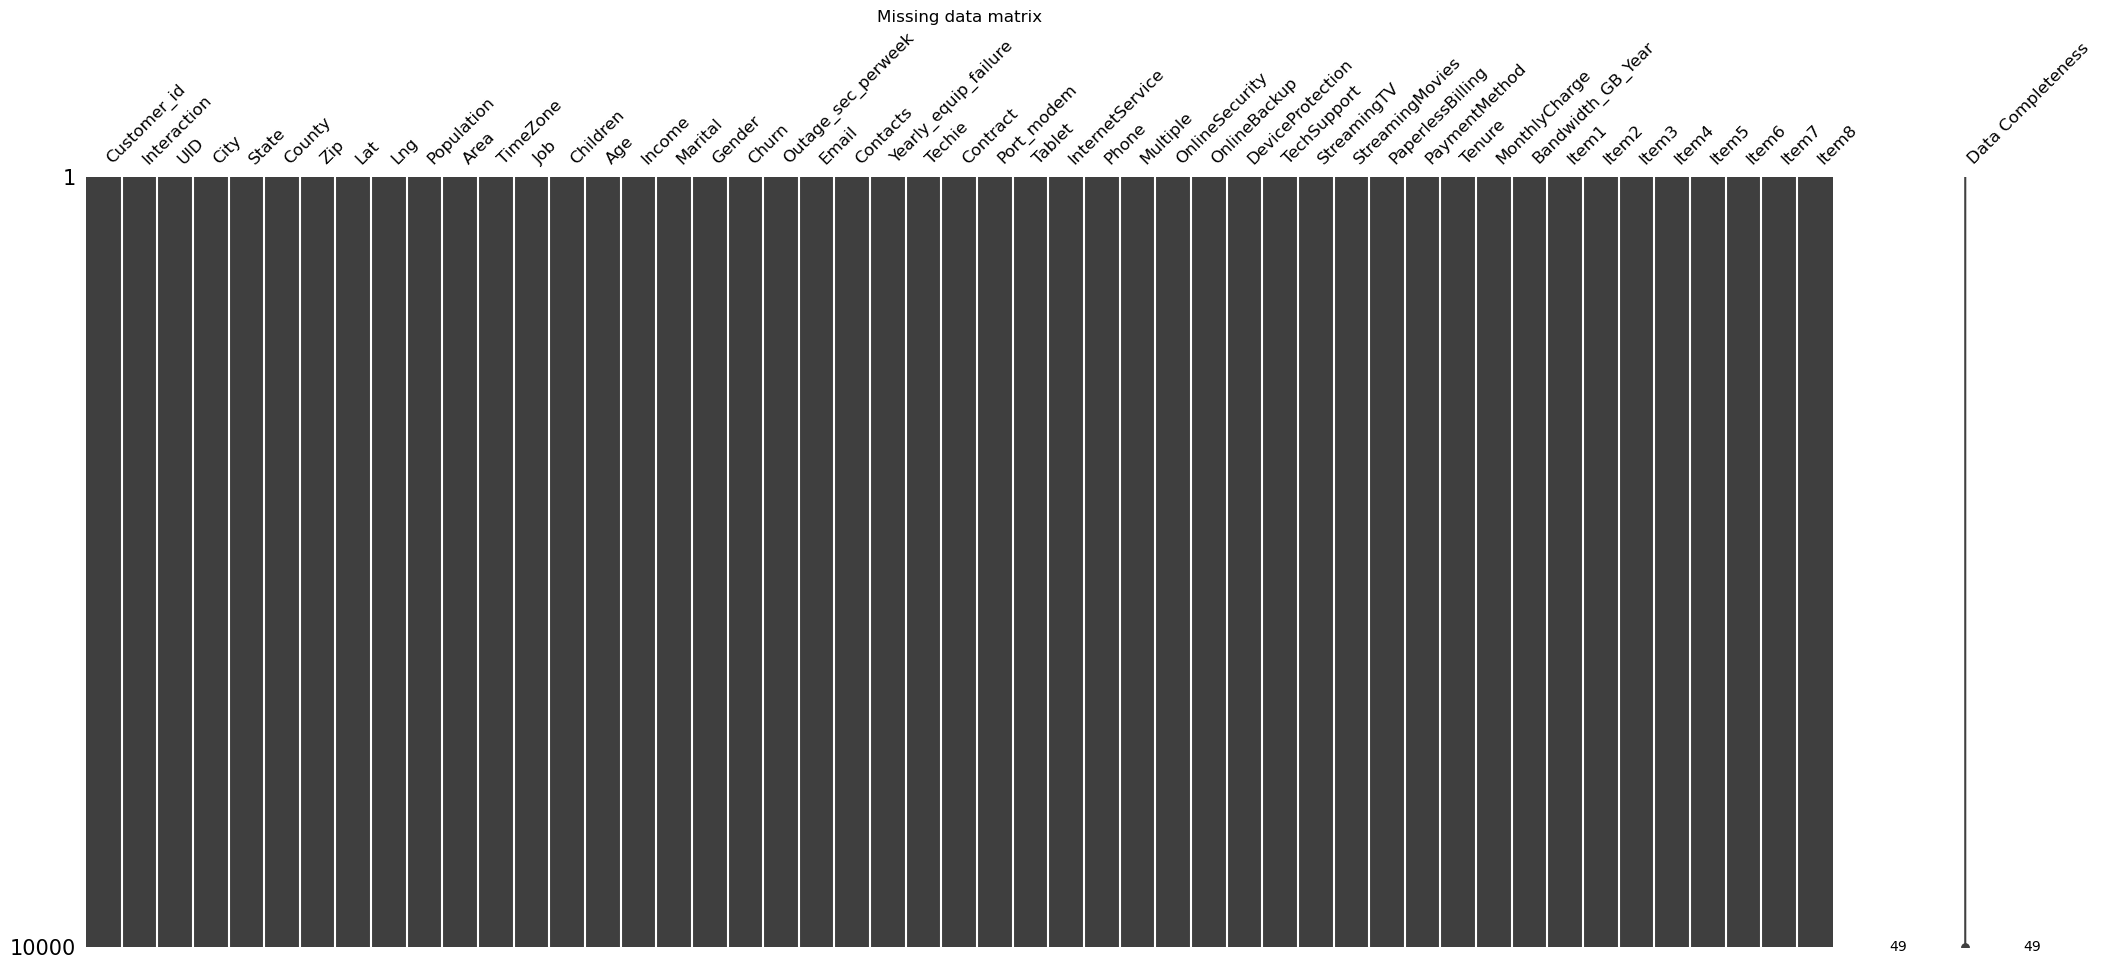

In [7]:
#Import missingno to visualize missing/null values 

import missingno as msno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()


### C2: DATA SET VARIABLES
* The variables listed below will be used in this task.

* Tenure will be our dependent variable and the other variables will be our independent variables. InternetService, Area, and Contract will be re-encoded with OneHotEncoder. Churn, Techie, and TechSupport will be re-expressed as binary 1/0
| Variable    | Categorical/Continuous | Independent/Dependent |
| :--------: | :-------: |:-------: |
| Tenure  | Continuous | Dependent |
| Bandwidth_GB_Year | Continuous | Independent |
| MonthlyCharge | Continuous | Independent |
| Age | Continuous | Independent |
| Outage_sec_perweek | Continuous | Independent |
| Income | Continuous | Independent |
| Population | Continuous | Independent |
| Churn | Categorical | Independent |
| Techie | Categorical | Independent |
| TechSupport | Categorical | Independent |
| InternetService | Categorical | Independent |
| Area | Categorical | Independent |
| Contract | Categorical | Independent |


 

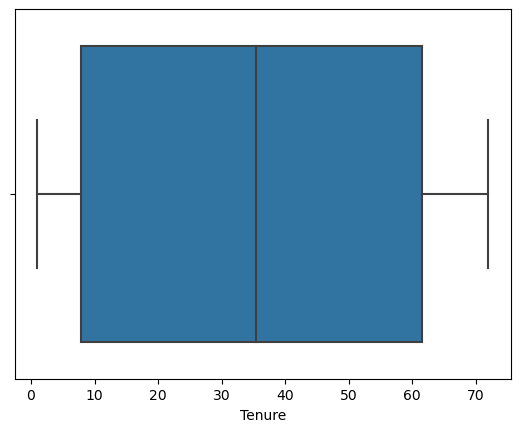

In [8]:
#Outlier check with boxplot on numerical continuous dependent variable 'Tenure'

boxplot=sns.boxplot(x='Tenure',data=df)

In [9]:
#Calculate Z-score for 'Tenure'

df['Z_Score_Tenure']=stats.zscore(df['Tenure'])
df[['Tenure','Z_Score_Tenure']].head(40)

,Tenure,Z_Score_Tenure
CaseOrder,,
1,6.795513,-1.048746
2,1.156681,-1.262001
3,15.754144,-0.709940
4,17.087227,-0.659524
5,1.670972,-1.242551
6,7.000994,-1.040975
7,13.236774,-0.805144
8,4.264255,-1.144476
9,8.220686,-0.994848


In [10]:
#Print number of outliers based on z-score for 'Tenure'

df_outliers = df.query('(Z_Score_Tenure > 3) | (Z_Score_Tenure < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Tenure'].to_dict().values())

Number of outliers: 0
Outlier values: dict_values([])


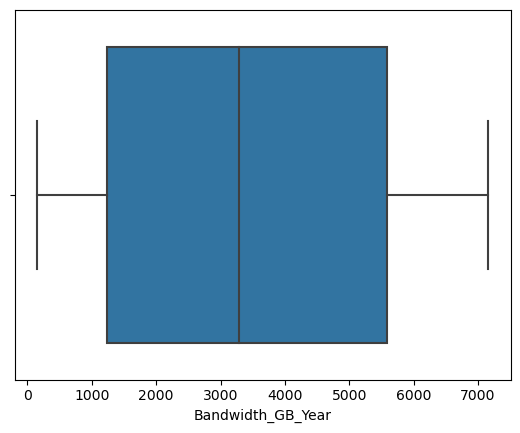

In [11]:
#Outlier check with boxplot on numerical continuous dependent variable 'Bandwidth_GB_Year'

boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=df)

In [12]:
#Calculate Z-score for 'Bandwidth_GB_Year'

df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
df[['Bandwidth_GB_Year','Z_Score_Bandwidth_GB_Year']].head(40)

,Bandwidth_GB_Year,Z_Score_Bandwidth_GB_Year
CaseOrder,,
1,904.536110,-1.138487
2,800.982766,-1.185876
3,2054.706961,-0.612138
4,2164.579412,-0.561857
5,271.493436,-1.428184
6,1039.357983,-1.076789
7,1907.242972,-0.679621
8,979.612708,-1.104130
9,1312.874964,-0.951620


In [13]:
#Print number of outliers based on z-score for 'Bandwidth_GB_Year'

df_outliers = df.query('(Z_Score_Bandwidth_GB_Year > 3) | (Z_Score_Bandwidth_GB_Year < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Bandwidth_GB_Year'].to_dict().values())

Number of outliers: 0
Outlier values: dict_values([])


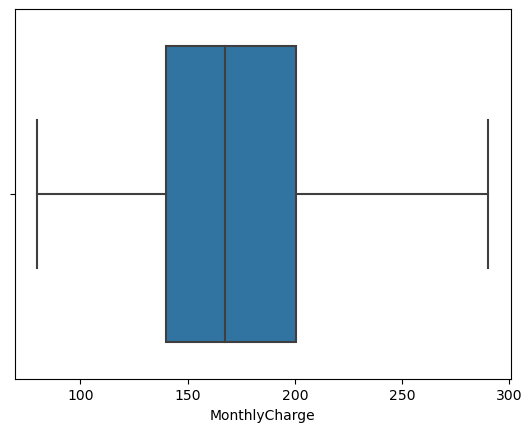

In [14]:
#Outlier check with boxplot on numerical continuous independent variable 'MonthlyCharge'

boxplot=sns.boxplot(x='MonthlyCharge',data=df)

In [15]:
#Calculate Z-score for 'MonthlyCharge'

df['Z_Score_MonthlyCharge']=stats.zscore(df['MonthlyCharge'])
df[['MonthlyCharge','Z_Score_MonthlyCharge']].head(40)

,MonthlyCharge,Z_Score_MonthlyCharge
CaseOrder,,
1,172.455519,-0.003943
2,242.632554,1.630326
3,159.947583,-0.295225
4,119.956840,-1.226521
5,149.948316,-0.528086
6,185.007692,0.288370
7,200.118516,0.640268
8,114.950905,-1.343098
9,117.468591,-1.284467


In [16]:
#Print number of outliers based on z-score for 'MonthlyCharge'

df_outliers = df.query('(Z_Score_MonthlyCharge > 3) | (Z_Score_MonthlyCharge < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['MonthlyCharge'].to_dict().values())


Number of outliers: 0
Outlier values: dict_values([])


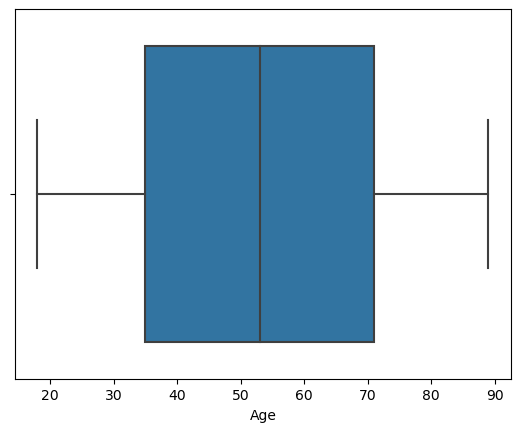

In [17]:
#Outlier check with boxplot on numerical continuous independent variable 'Age'

boxplot=sns.boxplot(x='Age',data=df)

In [18]:
#Calculate Z-score for 'Age'

df['Z_Score_Age']=stats.zscore(df['Age'])
df[['Age','Z_Score_Age']].head(40)

,Age,Z_Score_Age
CaseOrder,,
1,68,0.720925
2,27,-1.259957
3,50,-0.148730
4,48,-0.245359
5,83,1.445638
6,83,1.445638
7,79,1.252381
8,30,-1.115015
9,49,-0.197045


In [19]:
#Print number of outliers based on z-score for 'Age'

df_outliers = df.query('(Z_Score_Age > 3) | (Z_Score_Age < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Age'].to_dict().values())

Number of outliers: 0
Outlier values: dict_values([])


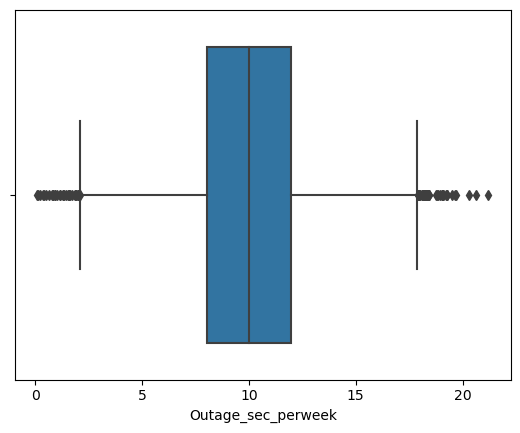

In [20]:
#Outlier check with boxplot on numerical continuous independent variable 'Outage_sec_perweek'

boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)

In [21]:
#Calculate Z-score for 'Outage_sec_perweek'

df['Z_Score_Outage_sec_perweek']=stats.zscore(df['Outage_sec_perweek'])
df[['Outage_sec_perweek','Z_Score_Outage_sec_perweek']].head(40)

,Outage_sec_perweek,Z_Score_Outage_sec_perweek
CaseOrder,,
1,7.978323,-0.679978
2,11.699080,0.570331
3,10.752800,0.252347
4,14.913540,1.650506
5,8.147417,-0.623156
6,8.420993,-0.531225
7,11.182725,0.396817
8,7.791632,-0.742712
9,5.739006,-1.432469


In [22]:
#Print number of outliers based on z-score for 'Outage_sec_perweek'

df_outliers = df.query('(Z_Score_Outage_sec_perweek > 3) | (Z_Score_Outage_sec_perweek < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Outage_sec_perweek'].to_dict().values())

Number of outliers: 28
Outlier values: dict_values([19.07180624, 19.08168517, 0.760277434, 19.2677815, 18.94289163, 0.120057716, 0.636607948, 0.5073749, 19.50058, 20.30462, 0.9952896, 0.2322795, 0.9003326, 21.20723, 0.3550483, 19.26111, 0.826998, 19.71756, 20.62504, 19.01962, 0.9403304, 0.3918659, 19.10781, 0.09974694, 19.65711, 19.01629, 19.20969, 0.827544])


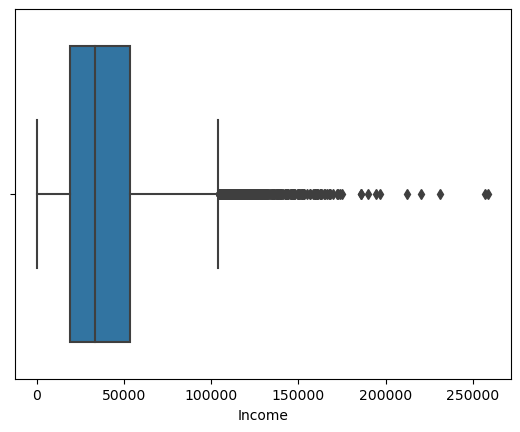

In [23]:
#Outlier check with boxplot on numerical continuous independent variable 'Income'

boxplot=sns.boxplot(x='Income',data=df)

In [24]:
#Calculate Z-score for 'Income'

df['Z_Score_Income']=stats.zscore(df['Income'])
df[['Income','Z_Score_Income']].head(40)

,Income,Z_Score_Income
CaseOrder,,
1,28561.99,-0.398778
2,21704.77,-0.641954
3,9609.57,-1.070885
4,18925.23,-0.740525
5,40074.19,0.009478
6,22660.20,-0.608072
7,11467.50,-1.004997
8,26759.64,-0.462694
9,58634.51,0.667680


In [25]:
#Print number of outliers based on z-score for 'Income'

df_outliers = df.query('(Z_Score_Income > 3) | (Z_Score_Income < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Income'].to_dict().values())

Number of outliers: 145
Outlier values: dict_values([132116.33, 125814.88, 135727.71, 156740.67, 146494.7, 159315.5, 163086.24, 172884.11, 169580.73, 168097.1, 125002.34, 132139.98, 131500.47, 186035.04, 154718.85, 126236.18, 162360.14, 132334.77, 135171.31, 126457.41, 149502.87, 165151.02, 147436.94, 152172.92, 137589.2, 127881.0, 146782.3, 137119.7, 143972.7, 143217.5, 134691.3, 142650.5, 128114.3, 138555.9, 175137.3, 131511.8, 152131.7, 146951.6, 145163.1, 145569.5, 129628.7, 160589.2, 167566.6, 159113.5, 149959.8, 142086.1, 125660.1, 138122.3, 125769.6, 152972.9, 147682.0, 172372.2, 131265.4, 128906.6, 138723.0, 128728.3, 166553.1, 139474.8, 189938.4, 129473.6, 149968.0, 126678.4, 124493.2, 125288.6, 258900.7, 130732.2, 134838.8, 156571.0, 143794.0, 133161.6, 162842.8, 129137.2, 151312.2, 135891.8, 146518.2, 152813.5, 141362.6, 131834.1, 124735.8, 131647.5, 160862.9, 220383.0, 130048.4, 135516.9, 151181.8, 161251.0, 212255.3, 125041.1, 137978.3, 131680.1, 167846.0, 132149.5, 129787

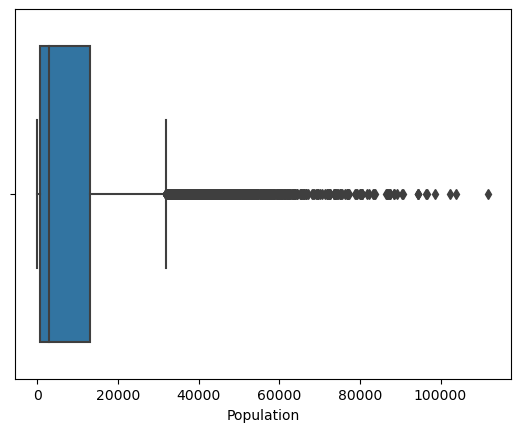

In [26]:
#Outlier check with boxplot on numerical continuous independent variable 'Population'

boxplot=sns.boxplot(x='Population',data=df)

In [27]:
#Calculate Z-score for 'Population'

df['Z_Score_Population']=stats.zscore(df['Population'])
df[['Population','Z_Score_Population']].head(40)

,Population,Z_Score_Population
CaseOrder,,
1,38,-0.673405
2,10446,0.047772
3,3735,-0.417238
4,13863,0.284537
5,11352,0.110549
6,17701,0.550475
7,2535,-0.500386
8,23144,0.927623
9,17351,0.526223


In [28]:
#Print number of outliers based on z-score for 'Population'

df_outliers = df.query('(Z_Score_Population > 3) | (Z_Score_Population < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Population'].to_dict().values())

Number of outliers: 219
Outlier values: dict_values([58431, 55519, 55122, 86926, 90517, 62430, 57344, 61045, 88349, 56959, 74971, 63318, 61572, 54150, 53140, 57511, 76973, 61509, 55652, 57642, 60461, 57955, 79276, 66531, 87240, 53364, 56765, 69142, 89075, 57800, 58129, 56284, 64417, 98660, 53431, 59191, 64417, 59586, 94395, 54829, 54621, 81789, 72332, 55222, 72592, 94512, 76819, 58123, 54023, 54023, 56308, 62429, 62131, 71763, 56446, 54190, 80555, 61045, 65123, 57181, 54081, 60408, 55215, 76177, 58705, 66053, 59556, 53098, 56406, 74971, 55623, 74601, 80489, 57955, 62382, 56790, 68676, 63393, 54464, 57658, 79996, 73671, 53552, 53364, 63659, 56642, 90675, 62491, 73671, 69589, 57886, 60033, 55857, 57775, 68300, 60944, 66056, 62135, 55352, 63911, 63465, 56308, 63425, 75635, 83615, 59609, 68128, 58673, 61850, 71360, 57181, 58160, 60270, 67053, 83179, 80489, 59009, 53886, 63218, 66583, 54601, 65347, 62274, 88344, 63884, 56641, 59482, 82257, 53364, 73671, 70614, 80264, 57306, 66053, 102433, 7

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_id                 10000 non-null  object 
 1   Interaction                 10000 non-null  object 
 2   UID                         10000 non-null  object 
 3   City                        10000 non-null  object 
 4   State                       10000 non-null  object 
 5   County                      10000 non-null  object 
 6   Zip                         10000 non-null  int64  
 7   Lat                         10000 non-null  float64
 8   Lng                         10000 non-null  float64
 9   Population                  10000 non-null  int64  
 10  Area                        10000 non-null  object 
 11  TimeZone                    10000 non-null  object 
 12  Job                         10000 non-null  object 
 13  Children                    100

### C3: STEPS FOR ANALYSIS
* The following code shows the summary statistics for my chosen dependent and independent variables. My chosen dependent variable 'Tenure' is a continuous numerical variable. as well as 6 of the 12 independent variables I have chosen for this analysis. Therefore I will use the describe() function to show their summary statistics. This function shows percentiles, standard deviation, min, max, and mean. 

* The other six independent variables are categorical variables. Within those 6 categorical variables, 'Churn', 'Techie', and 'TechSupport' are binary. Therefore, summary statistics for those variables will be shown with the value_counts() function, which shows the 'Yes' and 'No' count breakdowns. The other 3 categorical variables are 'Area', 'InternetService', and 'Contract'. These are nominal categorical variables which can also have their statistics shown with the value_counts() function.

* After data cleaning and summary statistics, the following code shows the transformation and preparation steps I have taken with this data set prior to running the XGBoost model. I established boolean indexing to my categorical variables and converted the yes/no format to 1/0. Nominal categorical variables were re-expressed with OneHotEncoder with all the constituent columns retained. Therefore, the first column was not dropped.  Next, I check the correlation coefficients for our chosen features against 'Tenure'. Finally, I saved only the 13 chosen variables into a new data frame called 'DT_prepared_df'. 
* Truly, there are 19 columns in this dataframe with the chosen target and features, however, due to OneHotEncoder splitting the nominal categorical variables into their individual constituent categories and assigning dedicated columns for each value, 6 new columns were added. 

In [30]:
#Numerical variables

In [31]:
df.Tenure.describe() 

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [32]:
df.Bandwidth_GB_Year.describe() 

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [33]:
df.MonthlyCharge.describe() 

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [34]:
df.Age.describe() 

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [35]:
df.Outage_sec_perweek.describe() 

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [36]:
df.Income.describe() 

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [37]:
df.Population.describe() 

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [38]:
#Categorical variables

In [39]:
#This is prior to binary re-expression for this variable

df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [40]:
#This is prior to binary re-expression for this variable

df.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [41]:
#This is prior to binary re-expression for this variable

df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [42]:
#This is prior to OneHotEncoder for this variable

df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [43]:
#This is prior to OneHotEncoder for this variable

df.Area.value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [44]:
#This is prior to OneHotEncoder for this variable

df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [45]:
#Establish boolean indexing
boolean_mapping = {'Yes' : 1, 'No' : 0}

#Then, convert 'Churn', 'Techie', and 'TechSupport' columns to booleans from string
df['Churn'] = df['Churn'].map(boolean_mapping)
df['Techie'] = df['Techie'].map(boolean_mapping)
df['TechSupport'] = df['TechSupport'].map(boolean_mapping)

In [46]:
#Scikit-learn OneHotEncoding (OHE) on 'InternetService'

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

ohetransform = ohe.fit_transform(df[['InternetService']])

df = pd.concat([df,ohetransform],axis=1).drop(columns=['InternetService'])



In [47]:
#Scikit-learn OneHotEncoding (OHE) on 'Area'

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

ohetransform = ohe.fit_transform(df[['Area']])

df = pd.concat([df,ohetransform],axis=1).drop(columns=['Area'])



In [48]:
#Scikit-learn OneHotEncoding (OHE) on 'Contract'

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform="pandas")

ohetransform = ohe.fit_transform(df[['Contract']])

df = pd.concat([df,ohetransform],axis=1).drop(columns=['Contract'])



In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_id                  10000 non-null  object 
 1   Interaction                  10000 non-null  object 
 2   UID                          10000 non-null  object 
 3   City                         10000 non-null  object 
 4   State                        10000 non-null  object 
 5   County                       10000 non-null  object 
 6   Zip                          10000 non-null  int64  
 7   Lat                          10000 non-null  float64
 8   Lng                          10000 non-null  float64
 9   Population                   10000 non-null  int64  
 10  TimeZone                     10000 non-null  object 
 11  Job                          10000 non-null  object 
 12  Children                     10000 non-null  int64  
 13  Age             

In [50]:
#Create new dataframe
DT_prepared_df = df[['Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Age', 'Outage_sec_perweek', 'Income', 'Population', 'Churn', 'Techie', 'TechSupport',  'InternetService_DSL', 'InternetService_Fiber Optic', 'InternetService_None', 'Area_Rural', 'Area_Suburban', 'Area_Urban', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year']]

DT_prepared_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       10000 non-null  float64
 1   Bandwidth_GB_Year            10000 non-null  float64
 2   MonthlyCharge                10000 non-null  float64
 3   Age                          10000 non-null  int64  
 4   Outage_sec_perweek           10000 non-null  float64
 5   Income                       10000 non-null  float64
 6   Population                   10000 non-null  int64  
 7   Churn                        10000 non-null  int64  
 8   Techie                       10000 non-null  int64  
 9   TechSupport                  10000 non-null  int64  
 10  InternetService_DSL          10000 non-null  float64
 11  InternetService_Fiber Optic  10000 non-null  float64
 12  InternetService_None         10000 non-null  float64
 13  Area_Rural      

In [51]:
DT_prepared_df.head()

,Tenure,Bandwidth_GB_Year,MonthlyCharge,Age,Outage_sec_perweek,Income,Population,Churn,Techie,TechSupport,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Area_Rural,Area_Suburban,Area_Urban,Contract_Month-to-month,Contract_One year,Contract_Two Year
CaseOrder,,,,,,,,,,,,,,,,,,,
1,6.795513,904.536110,172.455519,68,7.978323,28561.99,38,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.156681,800.982766,242.632554,27,11.699080,21704.77,10446,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,15.754144,2054.706961,159.947583,50,10.752800,9609.57,3735,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,17.087227,2164.579412,119.956840,48,14.913540,18925.23,13863,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,1.670972,271.493436,149.948316,83,8.147417,40074.19,11352,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
#Checking correlations between variables

DT_prepared_df.corr().abs().sort_values(by='Tenure', ascending=False)

,Tenure,Bandwidth_GB_Year,MonthlyCharge,Age,Outage_sec_perweek,Income,Population,Churn,Techie,TechSupport,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Area_Rural,Area_Suburban,Area_Urban,Contract_Month-to-month,Contract_One year,Contract_Two Year
Tenure,1.000000,0.991495,0.003337,0.016979,0.002932,0.002114,0.003559,0.485475,0.010041,0.001377,0.012674,0.003820,0.010098,0.016517,0.004263,0.012248,0.011806,0.006127,0.019495
Bandwidth_GB_Year,0.991495,1.000000,0.060406,0.014724,0.004176,0.003674,0.003902,0.441669,0.009455,0.000120,0.103132,0.061956,0.044727,0.016307,0.003913,0.012388,0.014497,0.003969,0.020566
Churn,0.485475,0.441669,0.372938,0.005630,0.000156,0.005937,0.008533,1.000000,0.066722,0.018838,0.093487,0.058472,0.037742,0.008971,0.006574,0.015554,0.267653,0.139043,0.178337
Contract_Two Year,0.019495,0.020566,0.002262,0.007326,0.015318,0.003964,0.018508,0.178337,0.006235,0.003726,0.002610,0.007298,0.011885,0.000270,0.008340,0.008622,0.622856,0.293243,1.000000
Age,0.016979,0.014724,0.010729,1.000000,0.008047,0.004091,0.010538,0.005630,0.007531,0.017155,0.004534,0.001240,0.003766,0.012693,0.005045,0.007641,0.010589,0.005215,0.007326
Area_Rural,0.016517,0.016307,0.002285,0.012693,0.003378,0.003501,0.001184,0.008971,0.005336,0.000164,0.004523,0.004471,0.000165,1.000000,0.500711,0.498576,0.003500,0.003992,0.000270
InternetService_DSL,0.012674,0.103132,0.094398,0.004534,0.011458,0.018814,0.005247,0.093487,0.002565,0.023172,1.000000,0.646211,0.378538,0.004523,0.005025,0.000509,0.004817,0.003135,0.002610
Area_Urban,0.012248,0.012388,0.004555,0.007641,0.002963,0.000926,0.010487,0.015554,0.003064,0.015508,0.000509,0.000232,0.000872,0.498576,0.500711,1.000000,0.003746,0.004513,0.008622
Contract_Month-to-month,0.011806,0.014497,0.012261,0.010589,0.008647,0.001600,0.007011,0.267653,0.001041,0.003734,0.004817,0.005661,0.001267,0.003500,0.000246,0.003746,1.000000,0.565296,0.622856
InternetService_None,0.010098,0.044727,0.237883,0.003766,0.007797,0.001261,0.005748,0.037742,0.005529,0.004857,0.378538,0.461753,1.000000,0.000165,0.000706,0.000872,0.001267,0.014080,0.011885


In [53]:
#Checking the transformed data one final time prior to exportation into our working .csv file

DT_prepared_df.head()

,Tenure,Bandwidth_GB_Year,MonthlyCharge,Age,Outage_sec_perweek,Income,Population,Churn,Techie,TechSupport,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Area_Rural,Area_Suburban,Area_Urban,Contract_Month-to-month,Contract_One year,Contract_Two Year
CaseOrder,,,,,,,,,,,,,,,,,,,
1,6.795513,904.536110,172.455519,68,7.978323,28561.99,38,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.156681,800.982766,242.632554,27,11.699080,21704.77,10446,1,1,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,15.754144,2054.706961,159.947583,50,10.752800,9609.57,3735,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,17.087227,2164.579412,119.956840,48,14.913540,18925.23,13863,0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,1.670972,271.493436,149.948316,83,8.147417,40074.19,11352,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### C4: CLEANED DATA SET
* The cell below contains the code run to create the prepared dataset for the XGBoost model

In [54]:
# Save dataframe to CSV and ignore index 

DT_prepared_df.to_csv (r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D209\PA Task 2\DT_churn_prepared.csv', index = False)

In [55]:
df = DT_prepared_df

### D1: SPLITTING THE DATA

* In this step, I chose the standard good practice 80:20 split for train-test. This is also known as the Pareto Principle. This principle states that, in most cases, 80% of effects come from 20% of causes (Detective, 2020).


In [56]:
#Establish Predictor Variables and Target Variable 

X = df.drop('Tenure', axis=1)
y = df['Tenure']


#Data split into train data and test data. I will choose the standard good practice train-test split of 80:20

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42) 

In [57]:
#Saving train/test/validation datasets for X/y to CSV 

X_train.to_csv('D209_Task_2_X_train.csv', index=False)

X_test.to_csv('D209_Task_2_X_test.csv', index=False)

X_val.to_csv('D209_Task_2_X_val.csv', index=False)

y_train.to_csv('D209_Task_2_y_train.csv', index=False)

y_test.to_csv('D209_Task_2_y_test.csv', index=False)

y_val.to_csv('D209_Task_2_y_val.csv', index=False)

### D2: OUTPUT AND INTERMEDIATE CALCULATIONS
* After data preparation, I ran an instance of XGBRegressor as the classification model for our chosen features and target. I meticulously and explicitly specified starting hyperparameter values for the model so that I could establish a baseline for my subsequent hyperparameter optimization. Tuning is not a part of this PA's objective, however, I believe it is still good practice to do so especially because XGBoost is very sensitive to hyperparameter values and real-life scenarios would more often than not call for tuning via optimization. 
* These starting values were chosen using the XGBoost hyperparameter tuning guide at Analytics Vidhya and Kaggle (Jain, 2024; (prashant111, A guide on XGBoost hyperparameters tuning 2020)).
* After an initial model was generated, I used Sci-kit optimize functions to perform Bayesian Optimization on our XGBoost model. This was done using BayesSearchCV with the assistance of other functions such as Real, Integer, DeadlineStopper, and DeltaYStopper. Real and Integer were used to properly express certain hyperparameters in the optimizer search spaces. The stoppers were used as a callback function in order to create both a model improvement threshold and a time limit due to realistic time constraints that we will have in the live Panopto demonstration. After experimentation, I found no improvement between 10 seconds and values less than 17.5 minutes of running the optimizer.
* A cell with the optimizer without the stoppers was also run outside of the Panopto demonstration and with outputs shown. The optimization in that specific cell took roughly 17.5 to run, with it's subsequent best parameters and score showing even more improvement than the threshold and time constrained version. Separate screenshots of those two cells will also be included in my submission. However, I will not run that version since it will take far too long for the purposes of the Panopto demonstration.
* In both optimization versions, best parameters were passed into another instance of XGBRegressor showing massive improvements in RMSE, MSE, and r-squared scores over the non-optimized XGBoost Regressor model
* The custom code created for the BayesSearchCV optimizer wrappers and the stoppers was taken from a combination of various sources such a Kaggle and the XGBoost and BayesSearchCV online manuals and documentation (Massaron, 2022). 

In [58]:
# Stratifying the target
y_stratified = pd.cut(y_train.rank(method='first'), bins=10, labels=False)

In [59]:
# Winsorizing lower bounds
from scipy.stats.mstats import winsorize
y_train = np.array(winsorize(y_train, [0.002, 0.0]))

In [60]:
# Reporting util for different optimizers
from time import time
import pprint
import joblib

def report_perf(optimizer, X, y, title="model", callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [61]:
# Setting the scoring function
from functools import partial
from sklearn.metrics import make_scorer

scoring = make_scorer(partial(MSE, squared=False), 
                      greater_is_better=False)

In [62]:
from sklearn.model_selection import KFold, StratifiedKFold

# Setting the validation strategy
skf = StratifiedKFold(n_splits=7,
                      shuffle=True, 
                      random_state=0)

cv_strategy = list(skf.split(X_train, y_stratified))

### ***This portion is where the models truly begin. 

In [63]:
import xgboost as xgb

#Create the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(
                              max_depth = 5, 
                              min_child_weight = 1, 
                              gamma = 0, 
                              subsample = 0.8, 
                              colsample_bytree = 0.8, 
                              n_estimators = 10,
                              scale_pos_weight = 1,
                              learning_rate = 0.1,
                              reg_alpha = 0.005,
                              reg_lambda = 1,
                              objective= 'reg:squarederror',
                              nthread = -1,
                              seed = 27,
                              booster='gbtree',
                              tree_method='exact',
                              random_state = 42
                             )


# Fit the model on the training set
xgb_reg.fit(
                X_train,
                y_train, 
                eval_set=[(X_val, y_val)], 
                verbose=True
                )


# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mse = MSE(y_test, y_pred)
rmse = mse**(1/2)
r2 = r2_score(y_test,y_pred)

print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R-Squared Score:", r2)




[0]	validation_0-rmse:23.75895
[1]	validation_0-rmse:21.41966
[2]	validation_0-rmse:19.31561
[3]	validation_0-rmse:17.42508
[4]	validation_0-rmse:15.71732
[5]	validation_0-rmse:14.18396
[6]	validation_0-rmse:12.80626
[7]	validation_0-rmse:12.47405
[8]	validation_0-rmse:12.46997
[9]	validation_0-rmse:11.26598
Test MSE: 126.8651885025128
Test RMSE: 11.26344478845228
Test R-Squared Score: 0.8178980762498028


In [64]:
# Cross-validation prediction with StratifiedKFold

folds = 10
skf = StratifiedKFold(n_splits=folds,
                      shuffle=True, 
                      random_state=0)

predictions = np.zeros(len(X_test))
rmse = list()

for k, (train_idx, val_idx) in enumerate(skf.split(X_train, y_stratified)):
    xgb_reg.fit(X_train.iloc[train_idx, :], y_train[train_idx])
    val_preds = xgb_reg.predict(X_train.iloc[val_idx, :])
    val_rmse = MSE(y_true=y_train[val_idx], y_pred=val_preds, squared=False)
    print(f"Fold {k} RMSE: {val_rmse:0.5f}")
    rmse.append(val_rmse)
    predictions += xgb_reg.predict(X_test).ravel()
    
predictions /= folds
print(f"repeated CV RMSE: {np.mean(rmse):0.5f} (std={np.std(rmse):0.5f})")

Fold 0 RMSE: 10.28949
Fold 1 RMSE: 10.24359
Fold 2 RMSE: 10.40556
Fold 3 RMSE: 10.29082
Fold 4 RMSE: 10.22318
Fold 5 RMSE: 10.35948
Fold 6 RMSE: 10.20993
Fold 7 RMSE: 10.35023
Fold 8 RMSE: 10.32463
Fold 9 RMSE: 10.21108
repeated CV RMSE: 10.29080 (std=0.06501)


In [65]:
#We will optimize the XGBoost Model with BayesSearchCV

from skopt import BayesSearchCV
from skopt.space import Real, Integer
from skopt.callbacks import DeadlineStopper, DeltaYStopper



# Define search space
search_spaces = {
    'max_depth': Integer(3, 10),
     'min_child_weight': Real(1, 12),
    'gamma': Real(0, 1),
    'n_estimators': Integer(10, 500),
    'scale_pos_weight': Integer(1, 10),
    'reg_alpha': Real(1e-9, 100, 'log-uniform'),
    'reg_lambda': Real(1e-9, 100, 'log-uniform'),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0)
}


# Establish XGBoost Regressor
xgb_reg = xgb_reg

# We stop if the gain of the optimization becomes too small
delta_y_stopper = DeltaYStopper(delta=0.0001)

# We impose a time limit (10 seconds for the purposes of Panopto)
# I will also show screenshots of even further optimized results which took ~15-17 minutes
deadline_stopper = DeadlineStopper(10)  



# Perform Bayesian optimization
bayes_search = BayesSearchCV(
                            estimator=xgb_reg, 
                            search_spaces=search_spaces, 
                            n_iter=120, 
                            cv=cv_strategy,
                            n_points=1,
                            n_jobs=1, 
                            iid=False,
                            return_train_score=False,                         
                            refit=False,       
                            verbose=2,  
                            optimizer_kwargs={'base_estimator': 'GP'},
                            random_state=42,
                            
                                )


callback=[delta_y_stopper, deadline_stopper]

callbacks=callback



best_params = report_perf(bayes_search, X_train, y_train,'XGBoost_regression', 
                          callbacks)


Fitting 7 folds for each of 1 candidates, totalling 7 fits
[CV] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.2387586688716479, max_depth=5, min_child_weight=8.37162743095828, n_estimators=213, reg_alpha=7.2484422626295345e-06, reg_lambda=0.13631591909504295, scale_pos_weight=4, subsample=0.8238957941734388; total time=   0.3s
[CV] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.2387586688716479, max_depth=5, min_child_weight=8.37162743095828, n_estimators=213, reg_alpha=7.2484422626295345e-06, reg_lambda=0.13631591909504295, scale_pos_weight=4, subsample=0.8238957941734388; total time=   0.3s
[CV] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.2387586688716479, max_depth=5, min_child_weight=8.37162743095828, n_estimators=213, reg_alpha=7.2484422626295345e-06, reg_lambda=0.13631591909504295, scale_pos_weight=4, subsample=0.8238957941734388; total time=   0.3s
[CV] END colsample_bytr

In [66]:
# Transferring the best parameters to our XGB regressor

from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
                    random_state=42, 
                    booster='gbtree', 
                    objective='reg:squarederror', 
                    tree_method='exact',
                    nthread = -1,
                    seed = 27,
                    **best_params
                    )


#Fitting the Model
xgb_reg.fit(X_train,y_train)

#Getting Predictions from the Model
y_pred = xgb_reg.predict(X_test)

#Evaluation Metrics
mse_dt = MSE(y_test,y_pred)
rmse_dt = mse_dt**(1/2)
r2_dt = r2_score(y_test,y_pred)


print(f"Mean Squared Error: {mse_dt}")
print(f"Root Mean Squared Error: {rmse_dt}")
print(f"R Squared Score: {r2_dt}")



Mean Squared Error: 1.5202576210144265
Root Mean Squared Error: 1.2329872752848776
R Squared Score: 0.9978178266185516


In [67]:
# Cross-validation prediction with StratifiedKFold

folds = 10
skf = StratifiedKFold(n_splits=folds,
                      shuffle=True, 
                      random_state=0)

predictions = np.zeros(len(X_test))
rmse = list()

for k, (train_idx, val_idx) in enumerate(skf.split(X_train, y_stratified)):
    xgb_reg.fit(X_train.iloc[train_idx, :], y_train[train_idx])
    val_preds = xgb_reg.predict(X_train.iloc[val_idx, :])
    val_rmse = MSE(y_true=y_train[val_idx], y_pred=val_preds, squared=False)
    print(f"Fold {k} RMSE: {val_rmse:0.5f}")
    rmse.append(val_rmse)
    predictions += xgb_reg.predict(X_test).ravel()
    
predictions /= folds
print(f"repeated CV RMSE: {np.mean(rmse):0.5f} (std={np.std(rmse):0.5f})")

Fold 0 RMSE: 1.24450
Fold 1 RMSE: 1.28423
Fold 2 RMSE: 1.28611
Fold 3 RMSE: 1.30857
Fold 4 RMSE: 1.27455
Fold 5 RMSE: 1.31868
Fold 6 RMSE: 1.35841
Fold 7 RMSE: 1.30432
Fold 8 RMSE: 1.31151
Fold 9 RMSE: 1.24451
repeated CV RMSE: 1.29354 (std=0.03289)


### D3: CODE EXECUTION
* The following code is all of the code I previously listed for section D2 since it is a PA task requirement. I will have also re-run the version of optimizer code without limits again prior to the live Panopto recording just to keep everything uniform. Please keep in mind that I am showing it just for demonstration purposes. The screenshots I will include will show the exact same code and results of those two cells. I won't run it in the live demonstration since it takes at least 17.5 minutes for the optimizer to find the absolute best parameters and scores for our XGBoost Regressor model. 

In [68]:
import xgboost as xgb

#Create the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(
                              max_depth = 5, 
                              min_child_weight = 1, 
                              gamma = 0, 
                              subsample = 0.8, 
                              colsample_bytree = 0.8, 
                              n_estimators = 10,
                              scale_pos_weight = 1,
                              learning_rate = 0.1,
                              reg_alpha = 0.005,
                              reg_lambda = 1,
                              objective= 'reg:squarederror',
                              nthread = -1,
                              seed = 27,
                              booster='gbtree',
                              tree_method='exact',
                              random_state = 42
                             )


# Fit the model on the training set
xgb_reg.fit(
                X_train,
                y_train, 
                eval_set=[(X_val, y_val)], 
                verbose=True
                )


# Make predictions on the test set
y_pred = xgb_reg.predict(X_test)

# Evaluate the model
mse = MSE(y_test, y_pred)
rmse = mse**(1/2)
r2 = r2_score(y_test,y_pred)

print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R-Squared Score:", r2)




[0]	validation_0-rmse:23.75895
[1]	validation_0-rmse:21.41966
[2]	validation_0-rmse:19.31561
[3]	validation_0-rmse:17.42508
[4]	validation_0-rmse:15.71732
[5]	validation_0-rmse:14.18396
[6]	validation_0-rmse:12.80626
[7]	validation_0-rmse:12.47405
[8]	validation_0-rmse:12.46997
[9]	validation_0-rmse:11.26598
Test MSE: 126.8651885025128
Test RMSE: 11.26344478845228
Test R-Squared Score: 0.8178980762498028


In [69]:
# Cross-validation prediction with StratifiedKFold

folds = 10
skf = StratifiedKFold(n_splits=folds,
                      shuffle=True, 
                      random_state=0)

predictions = np.zeros(len(X_test))
rmse = list()

for k, (train_idx, val_idx) in enumerate(skf.split(X_train, y_stratified)):
    xgb_reg.fit(X_train.iloc[train_idx, :], y_train[train_idx])
    val_preds = xgb_reg.predict(X_train.iloc[val_idx, :])
    val_rmse = MSE(y_true=y_train[val_idx], y_pred=val_preds, squared=False)
    print(f"Fold {k} RMSE: {val_rmse:0.5f}")
    rmse.append(val_rmse)
    predictions += xgb_reg.predict(X_test).ravel()
    
predictions /= folds
print(f"repeated CV RMSE: {np.mean(rmse):0.5f} (std={np.std(rmse):0.5f})")

Fold 0 RMSE: 10.28949
Fold 1 RMSE: 10.24359
Fold 2 RMSE: 10.40556
Fold 3 RMSE: 10.29082
Fold 4 RMSE: 10.22318
Fold 5 RMSE: 10.35948
Fold 6 RMSE: 10.20993
Fold 7 RMSE: 10.35023
Fold 8 RMSE: 10.32463
Fold 9 RMSE: 10.21108
repeated CV RMSE: 10.29080 (std=0.06501)


In [70]:
#We will optimize the XGBoost Model with BayesSearchCV

from skopt import BayesSearchCV
from skopt.space import Real, Integer
from skopt.callbacks import DeadlineStopper, DeltaYStopper



# Define search space
search_spaces = {
    'max_depth': Integer(3, 10),
     'min_child_weight': Real(1, 12),
    'gamma': Real(0, 1),
    'n_estimators': Integer(10, 500),
    'scale_pos_weight': Integer(1, 10),
    'reg_alpha': Real(1e-9, 100, 'log-uniform'),
    'reg_lambda': Real(1e-9, 100, 'log-uniform'),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0)
}


# Establish XGBoost Regressor
xgb_reg = xgb_reg

# We stop if the gain of the optimization becomes too small
delta_y_stopper = DeltaYStopper(delta=0.0001)

# We impose a time limit (10 seconds for the purposes of Panopto)
# I will also show screenshots of even further optimized results which took ~15-17 minutes
deadline_stopper = DeadlineStopper(10)  



# Perform Bayesian optimization
bayes_search = BayesSearchCV(
                            estimator=xgb_reg, 
                            search_spaces=search_spaces, 
                            n_iter=120, 
                            cv=cv_strategy,
                            n_points=1,
                            n_jobs=1, 
                            iid=False,
                            return_train_score=False,                         
                            refit=False,       
                            verbose=2,  
                            optimizer_kwargs={'base_estimator': 'GP'},
                            random_state=42,
                            
                                )


callback=[delta_y_stopper, deadline_stopper]

callbacks=callback



best_params = report_perf(bayes_search, X_train, y_train,'XGBoost_regression', 
                          callbacks)


Fitting 7 folds for each of 1 candidates, totalling 7 fits
[CV] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.2387586688716479, max_depth=5, min_child_weight=8.37162743095828, n_estimators=213, reg_alpha=7.2484422626295345e-06, reg_lambda=0.13631591909504295, scale_pos_weight=4, subsample=0.8238957941734388; total time=   0.4s
[CV] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.2387586688716479, max_depth=5, min_child_weight=8.37162743095828, n_estimators=213, reg_alpha=7.2484422626295345e-06, reg_lambda=0.13631591909504295, scale_pos_weight=4, subsample=0.8238957941734388; total time=   0.4s
[CV] END colsample_bytree=0.705051979426657, gamma=0.7277257431773251, learning_rate=0.2387586688716479, max_depth=5, min_child_weight=8.37162743095828, n_estimators=213, reg_alpha=7.2484422626295345e-06, reg_lambda=0.13631591909504295, scale_pos_weight=4, subsample=0.8238957941734388; total time=   0.4s
[CV] END colsample_bytr

In [71]:
# Transferring the best parameters to our XGB regressor

from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
                    random_state=42, 
                    booster='gbtree', 
                    objective='reg:squarederror', 
                    tree_method='exact',
                    nthread = -1,
                    seed = 27,
                    **best_params
                    )


#Fitting the Model
xgb_reg.fit(X_train,y_train)

#Getting Predictions from the Model
y_pred = xgb_reg.predict(X_test)

#Evaluation Metrics
mse_dt = MSE(y_test,y_pred)
rmse_dt = mse_dt**(1/2)
r2_dt = r2_score(y_test,y_pred)


print(f"Mean Squared Error: {mse_dt}")
print(f"Root Mean Squared Error: {rmse_dt}")
print(f"R Squared Score: {r2_dt}")



Mean Squared Error: 1.5202576210144265
Root Mean Squared Error: 1.2329872752848776
R Squared Score: 0.9978178266185516


In [72]:
# Cross-validation prediction with StratifiedKFold

folds = 10
skf = StratifiedKFold(n_splits=folds,
                      shuffle=True, 
                      random_state=0)

predictions = np.zeros(len(X_test))
rmse = list()

for k, (train_idx, val_idx) in enumerate(skf.split(X_train, y_stratified)):
    xgb_reg.fit(X_train.iloc[train_idx, :], y_train[train_idx])
    val_preds = xgb_reg.predict(X_train.iloc[val_idx, :])
    val_rmse = MSE(y_true=y_train[val_idx], y_pred=val_preds, squared=False)
    print(f"Fold {k} RMSE: {val_rmse:0.5f}")
    rmse.append(val_rmse)
    predictions += xgb_reg.predict(X_test).ravel()
    
predictions /= folds
print(f"repeated CV RMSE: {np.mean(rmse):0.5f} (std={np.std(rmse):0.5f})")

Fold 0 RMSE: 1.24450
Fold 1 RMSE: 1.28423
Fold 2 RMSE: 1.28611
Fold 3 RMSE: 1.30857
Fold 4 RMSE: 1.27455
Fold 5 RMSE: 1.31868
Fold 6 RMSE: 1.35841
Fold 7 RMSE: 1.30432
Fold 8 RMSE: 1.31151
Fold 9 RMSE: 1.24451
repeated CV RMSE: 1.29354 (std=0.03289)


### *** EXTRA: SUPERTREE PLOT OF XGBREGRESSOR MODEL
* This also was not a part of the objectives but is also very helpful with model interpretation, especially since SuperTree visuals are very interactive

In [73]:
#Preparing the datasets for plotting 

#Convert the other sets to array

y_val = y_val.to_numpy()
y_test = y_test.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

#Also convert X and y to array

X = X.to_numpy()
y = y.to_numpy()


In [74]:
# Extract feature names
feature_names = df.drop('Tenure', axis=1).columns.tolist()

# Extract target name
target_name = 'Tenure'


print(feature_names)
print(target_name)

['Bandwidth_GB_Year', 'MonthlyCharge', 'Age', 'Outage_sec_perweek', 'Income', 'Population', 'Churn', 'Techie', 'TechSupport', 'InternetService_DSL', 'InternetService_Fiber Optic', 'InternetService_None', 'Area_Rural', 'Area_Suburban', 'Area_Urban', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year']
Tenure


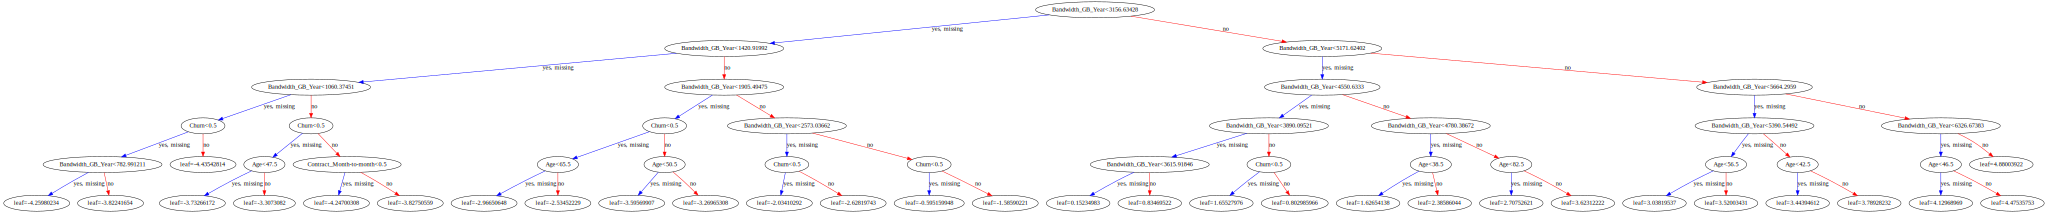

In [75]:
#Plotting the XGBoost Regressor with Graphviz

import xgboost
import graphviz
import os

tree_dot = xgboost.to_graphviz(xgb_reg, num_trees=2)

# Save the dot file
dot_file_path = "xgboost_tree.dot"
tree_dot.save(dot_file_path)

# Convert dot file to png and display
with open(dot_file_path) as f:
    dot_graph = f.read()

# Use graphviz to display the tree
graph = graphviz.Source(dot_graph)
graph.render("xgboost_tree")

graph

In [76]:
#Plotting the XGBoost Regressor Tree with SuperTree (this is more resource intensive but is interactive)

from supertree import SuperTree 

super_tree = SuperTree(xgb_reg, X, y, feature_names, target_name)

super_tree.show_tree()

### ***EXTRA: RESIDUAL PLOTS FOR TRAINING, VALIDATION, AND TEST SETS
* This was not a part of the task objectives, however, I thought it would be useful to create visuals that could assist with model interpretation.

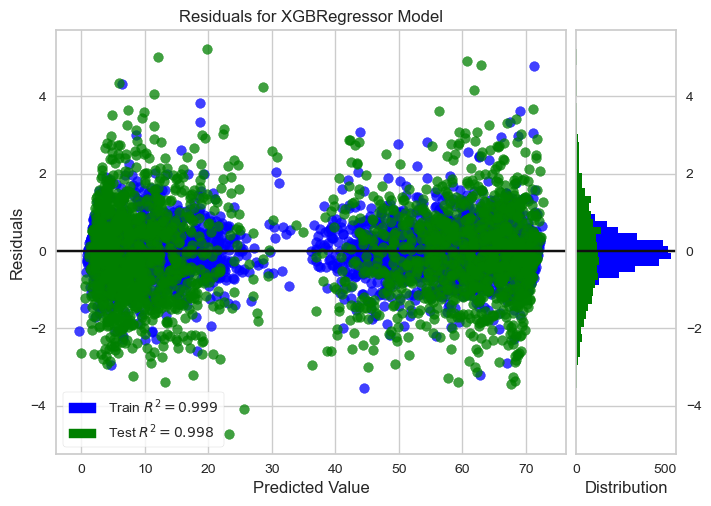

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [77]:
#Plot residuals for train and test 

from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(xgb_reg, train_color="blue", test_color="green")
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

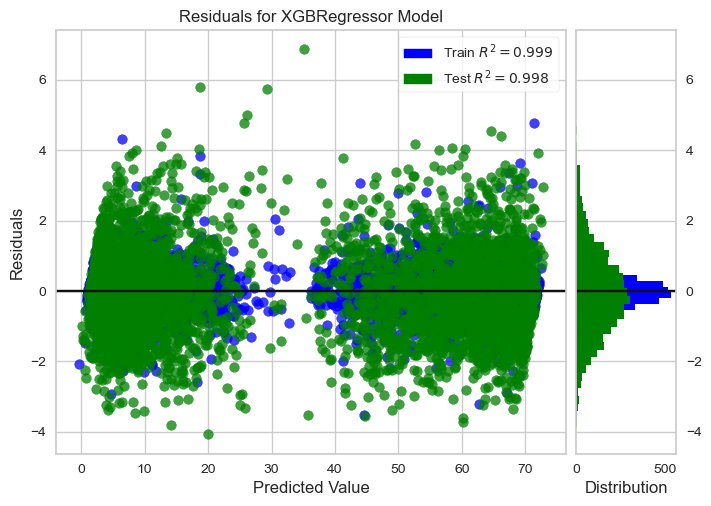

<Axes: title={'center': 'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [78]:
#Plot residuals for the validation set

visualizer = ResidualsPlot(xgb_reg, train_color="blue", test_color="green")
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the validation data
visualizer.show()

### ***EXTRA: FEATURE IMPORTANCES PLOT
* This was not a part of the task objectives, however, I thought it would be useful to create visuals that could assist with model interpretation.

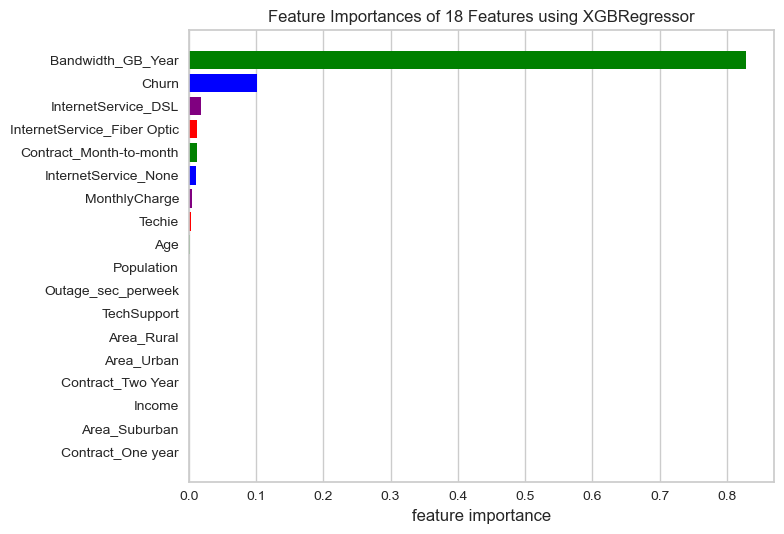

<Axes: title={'center': 'Feature Importances of 18 Features using XGBRegressor'}, xlabel='feature importance'>

In [79]:
#Plotting Feature Importances

from yellowbrick.model_selection import FeatureImportances

# Create the visualizer
viz = FeatureImportances(xgb_reg, relative=False, colors=['blue', 'green', 'red', 'purple'], labels = feature_names)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

### E1: ACCURACY AND MSE
* Both R-squared and RMSE are used to indicate a model fit in gradient boosting, however, they each indicate different information.
* The RMSE on my hyperparameter tuned XGBoost Regressor model was 1.233 and MSE at 1.520. The R-Squared score was 0.9978
* RMSE represents the average magnitude of the errors between the model's predictions and the actual target values, calculated by taking the square root of the mean squared errors (MSE). This indicates how well the gradient boosting model performs on a regression task. Therefore, a lower RMSE signifies a better fit to the data and more accurate predictions. This metric is useful since it gives us an idea of the average distance between the observed data values and the predicted data values.
*  Conversely, R-Squared indicates how well the model fits the data by showing the proportion of variance in the dependent variable that is explained by the model's predictions. Higher values signify a better fit, meaning that the model explains a larger portion of the variance in the data. This is a useful metric, however, in Gradient Boosted Models, a high R-squared doesn't necessarily guarantee a good model, especially if overfitting is present ( Bobbitt, 2021).

### E2: RESULTS AND IMPLICATIONS
* Since my RMSE was low at 1.233, it suggests that this model is a good fit for the data in predicting Tenure. MSE is simply the squared value of RMSE, but RMSE is more commonly used in interpreting whether models are a good fit for the data since they are easier to understand. MSE interpretation is along the same vein, being the squared value of RMSE, however, RMSE is easier to interpret.
* R-Squared at 0.9978 indicates that the model explains nearly all of the variance in the target variable, where 0 means the model explains none of the variance and 1 means it explains all the variance.
* The hyperparameters in XGBoost Regressor was meticulously tuned via Bayesian Optimization using BayesSearchCV and cross validated over 10 fold with Stratified K Fold. Each fold showed RMSE values very close to the RMSE value on the final test set (repeated CV RMSE: 1.29354 (std=0.03289). Therefore, I have high confidence in the R-squared and RMSE being representative of the model being a good fit for the data, especially when L1 and L2 regularization, which mitigate overfitting, were part of the optimized hyperparameters.

### E3: LIMITATION
* Despite the advantages offered by Gradient Boosted Models such as XGBoost, there are also several drawbacks which are the following (XGBoost Advantages and disadvantages (pros vs cons) 2024): 

* Requires careful parameter tuning to achieve optimal performance
* Can be prone to overfitting if not properly regularized
* May not perform as well with high-dimensional sparse data
* Training can be computationally expensive, especially with large datasets
* Interpreting the model can be challenging due to its complexity

### E4: COURSE OF ACTION
* One potential further course of action to take based on the predictions is to look further into Bandwidth_GB_Year and Churn alongside Tenure. Intuitively, it is not too surprising to see that these variables have influnces on predictions made on the others. Customers who do not churn or have not done so recently will naturally have a longer tenure. Therefore, it will also be interesting to see what services they use and are satisfied with that cause them to consume certain amounts of data bandwidth. 

### F: PANOPTO RECORDING
* My Panopto Submission can be found at the following link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c32b03c8-40a6-4712-8d1b-b24d0068b0fd

### G: SOURCES FOR THIRD-PARTY CODE

Jain, A. (2024, December 16). XGBOOST parameters tuning: A complete guide with python codes. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/#h-step5-tuning-regularization-parameters 

Massaron, L. (2022, January 8). [tutorial] bayesian optimization with XGBoost. Kaggle. https://www.kaggle.com/code/lucamassaron/tutorial-bayesian-optimization-with-xgboost 

prashant111. (2020, July 15). A guide on XGBoost hyperparameters tuning. Kaggle. https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning 

### H: SOURCES

Bobbitt, Z. (2021, May 10). How to interpret root mean square error (RMSE). Statology. https://www.statology.org/how-to-interpret-rmse/ 

Categorical predictors: How many dummies to use in regression vs. K-nearest neighbors. Categorical predictors: how many dummies to use in regression vs. k-nearest neighbors. (n.d.). https://www.bzst.com/2015/08/categorical-predictors-how-many-dummies.html 

Detective, T. D. (2020, January 31). Finally: Why we use an 80/20 split for training and Test Data Plus an alternative method (oh yes...). Medium. https://towardsdatascience.com/finally-why-we-use-an-80-20-split-for-training-and-test-data-plus-an-alternative-method-oh-yes-edc77e96295d 

Jain, A. (2024, December 16). XGBOOST parameters tuning: A complete guide with python codes. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/#h-step5-tuning-regularization-parameters 

Massaron, L. (2022, January 8). [tutorial] bayesian optimization with XGBoost. Kaggle. https://www.kaggle.com/code/lucamassaron/tutorial-bayesian-optimization-with-xgboost 

prashant111. (2020, July 15). A guide on XGBoost hyperparameters tuning. Kaggle. https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning 

Rodriguez, C. (2023, May 26). The notorious XGBoost. Medium. https://towardsdatascience.com/the-notorious-xgboost-c7f7adc4c183 

Sriraman, I. (2024, September 11). A deep dive into xgboost: How it works and its differences from GBM. Medium. https://ishwaryasriraman.medium.com/a-deep-dive-into-xgboost-how-it-works-and-its-differences-from-gbm-11b0b01f9714#:~:text=XGBoost%20(Extreme%20Gradient%20Boosting)%20is,This%20helps%20prevent%20overfitting. 

What is XGBoost?. NVIDIA Data Science Glossary. (n.d.). https://www.nvidia.com/en-us/glossary/xgboost/#:~:text=XGBoost%2C%20which%20stands%20for%20Extreme,%2C%20classification%2C%20and%20ranking%20problems. 

Wohlwend, B. (2023, July 23). Decision tree, Random Forest, and XGBoost: An exploration into the heart of machine learning. Medium. https://medium.com/@brandon93.w/decision-tree-random-forest-and-xgboost-an-exploration-into-the-heart-of-machine-learning-90dc212f4948 

XGBoost Advantages and disadvantages (pros vs cons). XGBoosting. (n.d.-a). https://xgboosting.com/xgboost-advantages-and-disadvantages-pros-vs-cons/ 

XGBOOST assumes data is IID (i.i.d.). XGBoosting. (n.d.-a). https://xgboosting.com/xgboost-assumes-data-is-iid-i.i.d./ 

XGBoost robust to correlated input features (multi-collinearity). XGBoosting. (n.d.-b). https://xgboosting.com/xgboost-robust-to-correlated-input-features-multi-collinearity/ 

XGBoost robust to outliers in data. XGBoosting. (n.d.-c). https://xgboosting.com/xgboost-robust-to-outliers-in-data/#:~:text=XGBoost%20is%20known%20for%20its,noisy%20data%20without%20extensive%20cleaning. 